# 讀取資料

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from ccuhdf import get_path, VNAxDC
# data = np.flip(data, axis=1).T
# data = data.T
data_filepath = get_path('.hdf5', title = 'open .hdf5 file contains MEASURMENT data.')
print('measurement data file path:\n', data_filepath)

measurement data file path:
 C:/Users/user/Desktop/QEL專案/MIRROR/Hsu_mirror(source)/274ms only x2=160.01mm (no x1)_II_debackground.hdf5


# Plot整張圖

file:C:/Users/user/Desktop/QEL專案/MIRROR/Hsu_mirror(source)/274ms only x2=160.01mm (no x1)_II_debackground.hdf5


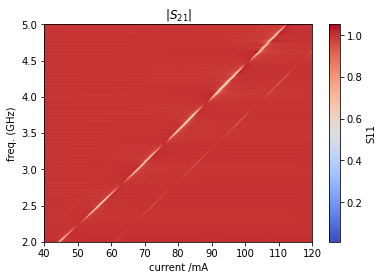

In [32]:
data = VNAxDC.get_data(data_filepath)
info = VNAxDC.get_info(data_filepath, print_info=False)
fig, ax, extent, flipfunc = VNAxDC.get_ploting_objs(info)
 
data_0 = flipfunc(data)

'''def contrast(data):

    if abs(data)>1:
    
'''
print(f'file:{data_filepath}')

im = ax.imshow(abs(data_0), cmap='coolwarm', aspect='auto',extent= extent)
plt.colorbar(im).set_label(info['VNA - trace'] )



plt.xlabel('current /mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
#plt.text(56,3.1,f'(file:{data_filepath})', ha='center')
plt.show()




In [5]:
s = data_0.shape
print(s)

print(info)

(3001, 401)
{'VNA - trace': 'S11', 'VNA - # of points': 3001, 'VNA - # of traces': 401, 'VNA - start frequency': 2000000000.0, 'VNA - stop frequency': 5000000000.0, 'DC1 - sweep': False, 'DC1 - current': 0.04, 'DC2 - sweep': True, 'DC2 - start current': 0.04, 'DC2 - stop current': 0.12, 'DC2 - # of steps': 401}


# 切個Traces(確實)

(3001, 401)


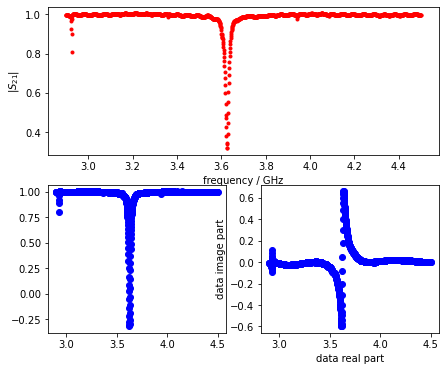

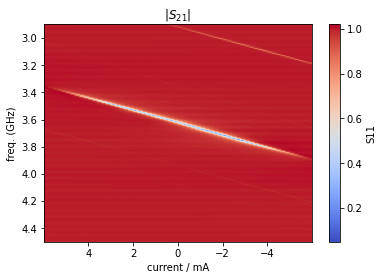

In [57]:
def get_fslice(info, frange):
    f0 = info['VNA - start frequency']
    f1 = info['VNA - stop frequency']
    nf = info['VNA - # of points']
    i0 = info['DC2 - start current']
    i1 = info['DC2 - stop current']
    ni = info['DC2 - # of steps']
    step = (f1 - f0) / nf
    step_i = (i1 - i0) / ni
    
    current = np.linspace(i0, i1, ni)
    frq = np.linspace(f0, f1, nf)
    return slice(int( (frange[0] - f0) // step - 1), 
                 int( (frange[1] - f0) // step + 1)) , frq, step_i

strat_f, stop_f = 2.9e+9, 4.5e+9
screen , frq , step_i = get_fslice(info, [strat_f, stop_f])  #3.5e+9,6e+9
trace_no = 210

#screen = slice(None)
s = data_0.shape
print(s)


plt.figure(figsize= (7,6))

plt.subplot(211)
#Vmax = np.maximum(abs(data[:, trace_no]), 0.3)
plt.plot(frq[screen]/1e+9, abs( data[:, trace_no:trace_no+1])[screen], 'r .')
#plt.ylim(0,0.08)
plt.xlabel( 'frequency / GHz')
plt.ylabel('$|S_{21}|$')
#plt.title(f'Trace No.{trace_no}')
plt.subplot(223)
plt.plot(frq[screen]/1e+9, np.real(data[:, trace_no:trace_no+1])[screen],'bo')
plt.subplot(224)
plt.plot(frq[screen]/1e+9, np.imag(data[:, trace_no:trace_no+1])[screen],'bo')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title

d_trace = 30
extent = [ d_trace*1e3*step_i, -1e3*d_trace*step_i, max(frq[screen]/1e+9), min(frq[screen]/1e+9)]

fig, ax = plt.subplots(figsize=(6, 4))
#plt.imshow(abs(data_0), cmap='coolwarm', aspect='auto',)
im = ax.imshow(abs(data[:,trace_no-d_trace:trace_no+d_trace ])[screen], cmap='coolwarm', aspect='auto', extent = extent)
plt.colorbar(im).set_label(info['VNA - trace'] )
plt.xlabel('current / mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
plt.show()


## find dip point as the centra of the figure

210 3.625


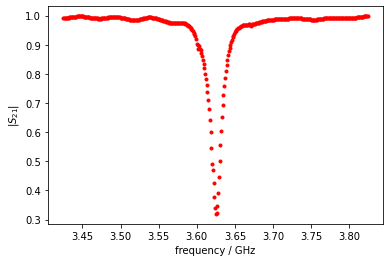

211 3.635


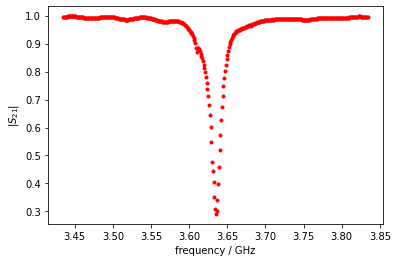

212 3.644


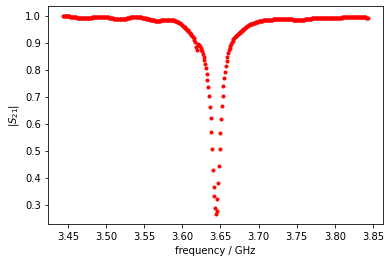

213 3.653


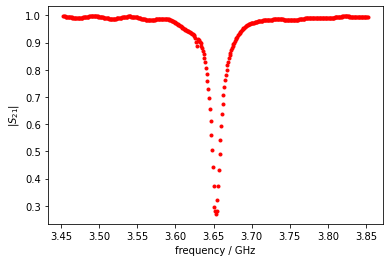

214 3.662


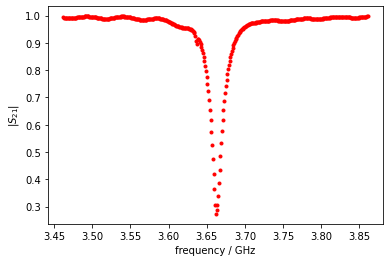

215 3.672


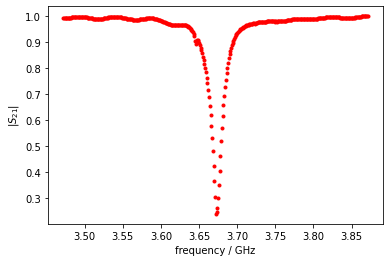

216 3.683


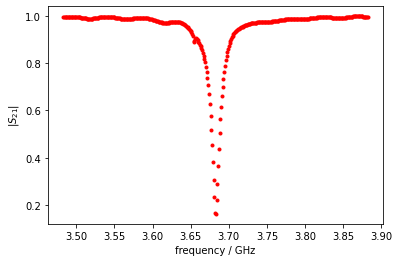

217 3.691


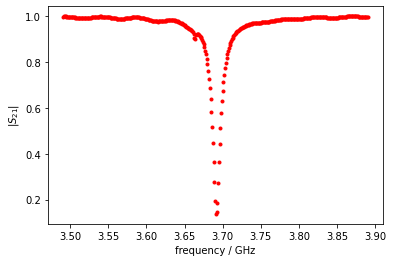

218 3.7


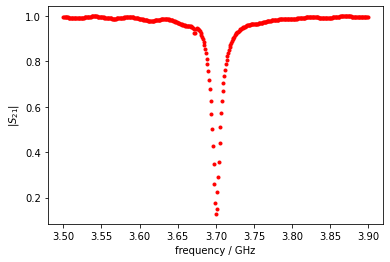

219 3.709


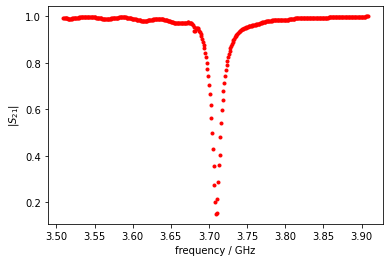

slice(1519, 1919, None)


In [80]:
def get_dip(s_data):
    dip_p = np.argmin(s_data)
    return dip_p

trace_no = 210
for trace_no in range(210, 220):
    dip_p = get_dip(np.abs(data[:, trace_no:trace_no+1]))
    print(trace_no, frq[dip_p]/1e+9)
    screen_p = slice(dip_p-200, dip_p+200)
    plt.plot(frq[screen_p]/1e+9, abs( data[screen_p, trace_no:trace_no+1]), 'r .')
    #plt.ylim(0,0.08)
    plt.xlabel( 'frequency / GHz')
    plt.ylabel('$|S_{21}|$')
    plt.show()


print(screen)


# 單一trace fiting

210 3.625
Fitted Parameters:
>> omega_m = 3.62576623566758
>> alpha = 0.006663003533563675
>> kappa = 0.01184494936160934


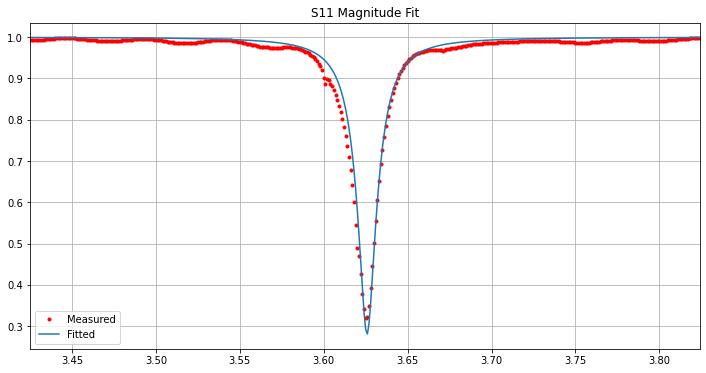

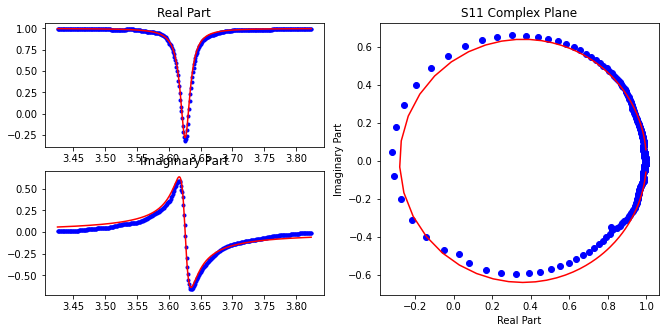

211 3.635
Fitted Parameters:
>> omega_m = 3.635053364592231
>> alpha = 0.006879071780609115
>> kappa = 0.012036019087113088


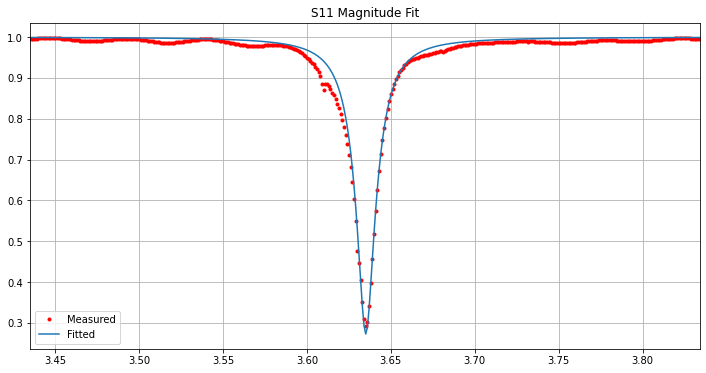

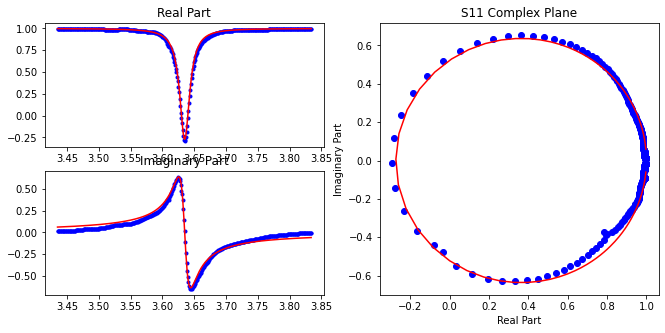

212 3.644
Fitted Parameters:
>> omega_m = 3.6443082403401523
>> alpha = 0.007105951111664131
>> kappa = 0.012140713392539646


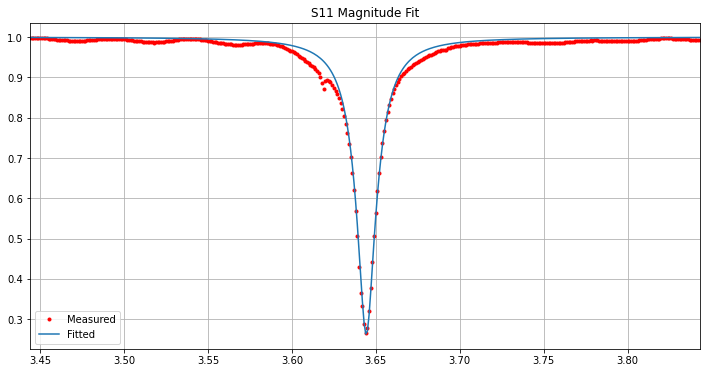

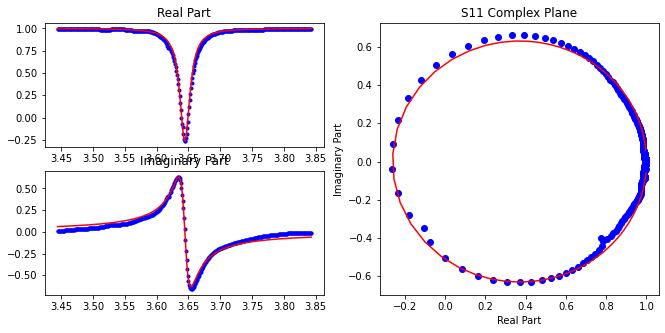

213 3.653
Fitted Parameters:
>> omega_m = 3.6535735712861985
>> alpha = 0.007230041558866478
>> kappa = 0.012245386505354597


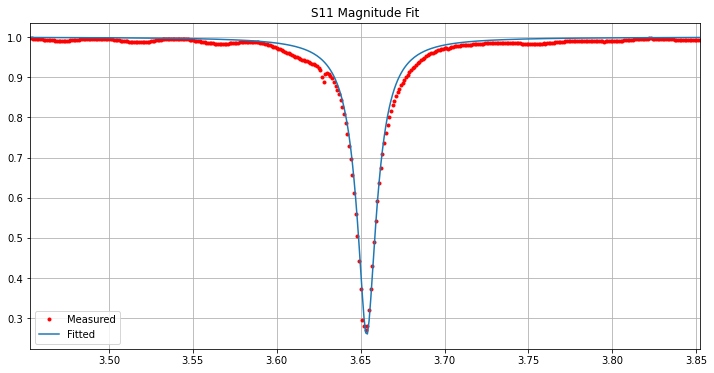

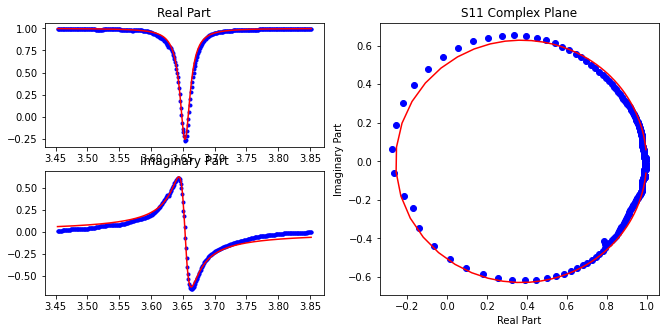

214 3.662
Fitted Parameters:
>> omega_m = 3.6629281701554643
>> alpha = 0.007346179712070623
>> kappa = 0.01226441952281125


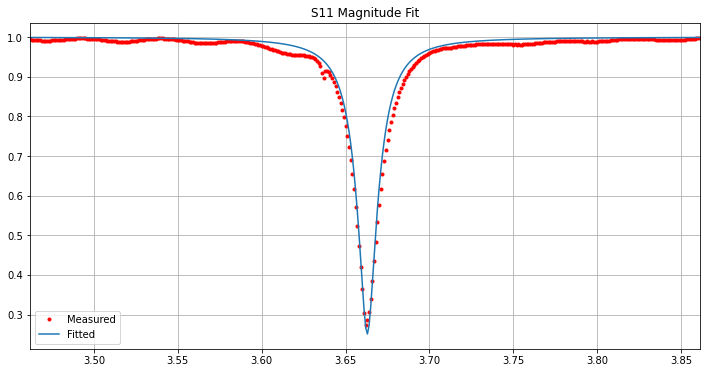

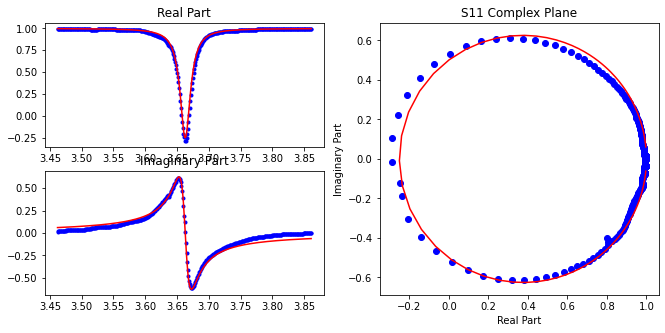

215 3.672
Fitted Parameters:
>> omega_m = 3.672331365415055
>> alpha = 0.007606674502651412
>> kappa = 0.012044864362985496


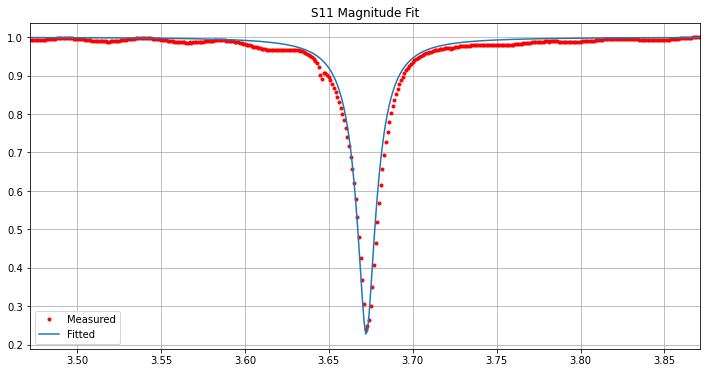

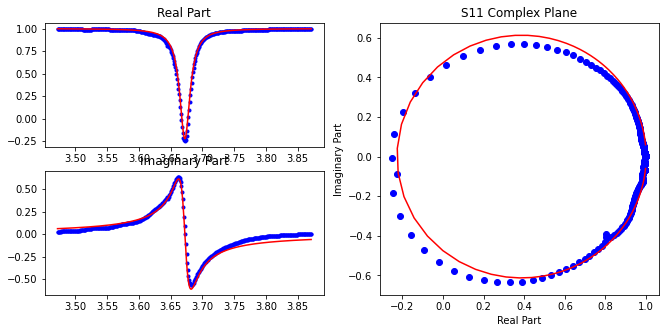

216 3.683
Fitted Parameters:
>> omega_m = 3.600041750683879
>> alpha = 0.007012016771746876
>> kappa = 0.0


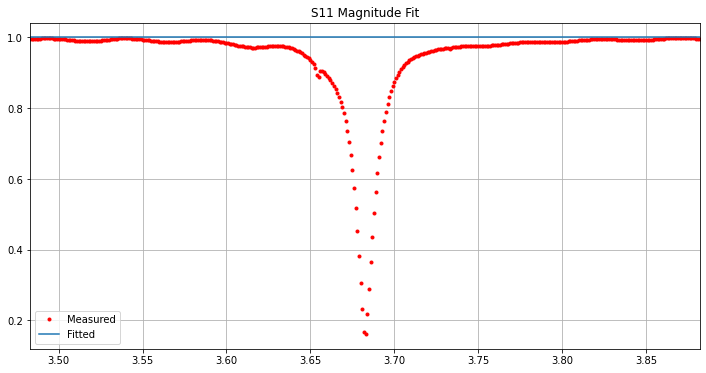

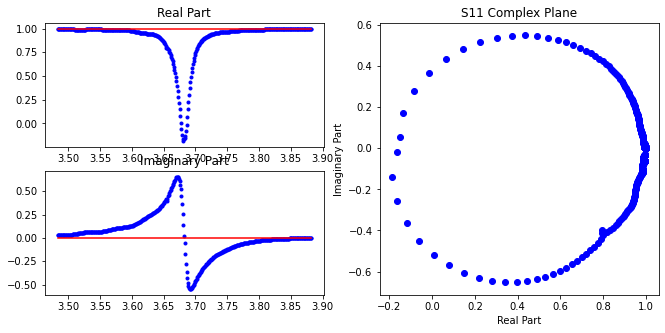

217 3.691
Fitted Parameters:
>> omega_m = 3.600026495285225
>> alpha = 0.0069601264619096595
>> kappa = 0.0


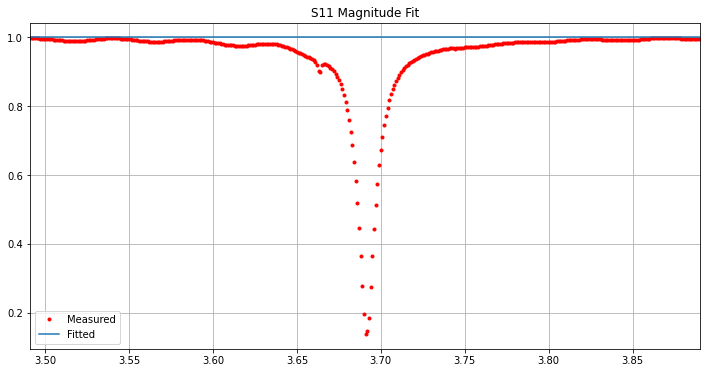

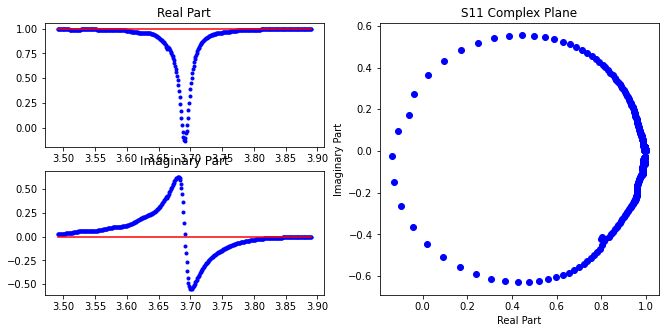

218 3.7
Fitted Parameters:
>> omega_m = 3.600018357614433
>> alpha = 0.006931469111194339
>> kappa = 0.0


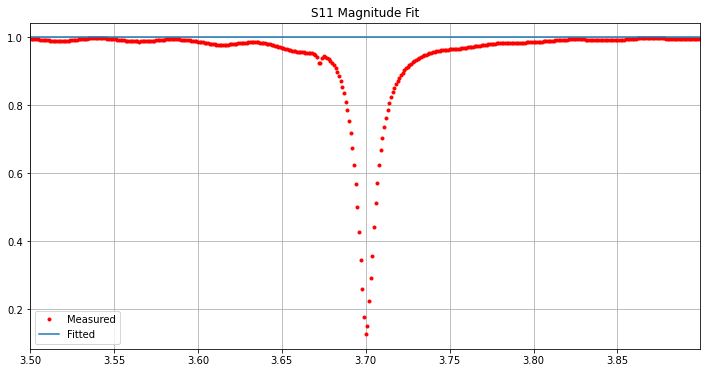

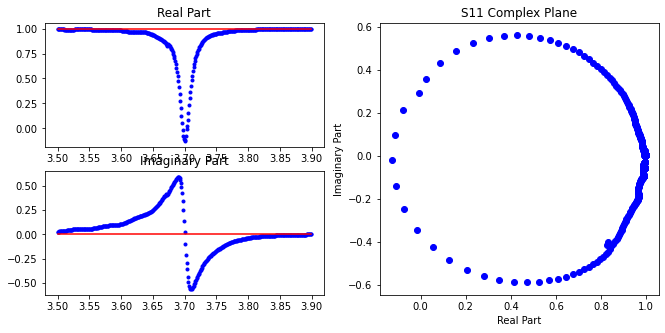

219 3.709
Fitted Parameters:
>> omega_m = 3.6000109764058075
>> alpha = 0.0069082239499571926
>> kappa = 0.0


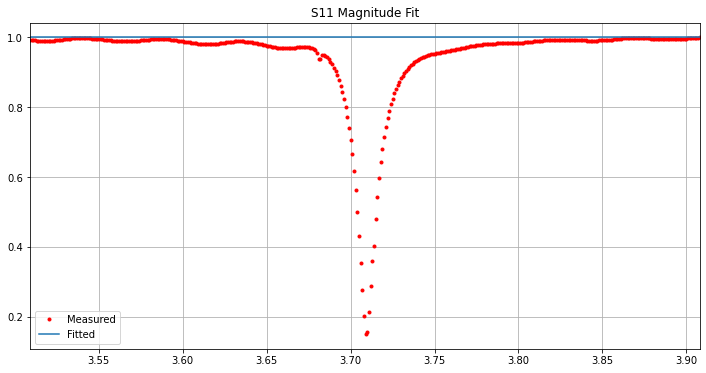

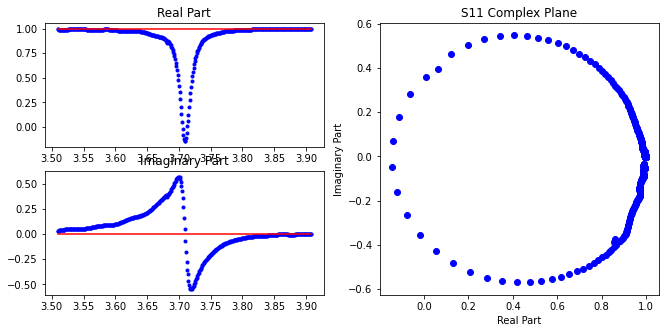

In [87]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import inspect

# Constants
pi = np.pi


def s11(omega, omega_m, alpha, kappa):
    """
    Computes the S11 parameter based on given frequency (omega) and system parameters.
    """
    Gamma = (alpha + kappa) / 2
    s11_value = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return np.hstack([s11_value.real, s11_value.imag])

def fit_s11(frequencies, measured_s11, initial_guess):
    """
    Fits the S11 function to measured data.
    """
    param_names = list(inspect.signature(s11).parameters.keys())[1:]
    
    coeffs, cov = curve_fit(
        s11,
        frequencies,
        ydata=np.hstack([measured_s11.real, -1*measured_s11.imag]),
        bounds=([0, 0, 0], [100, 100, 100]),
        method='dogbox',
        p0=initial_guess,
    )
    
    print('Fitted Parameters:')
    for name, value in zip(param_names, coeffs):
        print(f">> {name} = {value}")
    
    return coeffs

def plot_results(frequencies, measured_s11, fitted_s11):
    """
    Plots the measured and fitted S11 magnitude.
    """
    midpoint = fitted_s11.shape[-1] // 2
    real_part = fitted_s11[:midpoint]
    imag_part = fitted_s11[midpoint:]
    sum_complex = real_part + 1j * imag_part
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, abs(measured_s11), 'r .', label='Measured')
    plt.plot(frequencies, abs(sum_complex), label='Fitted')
    plt.xlim(np.min(frequencies), np.max(frequencies))
    plt.legend()
    plt.grid()
    plt.title("S11 Magnitude Fit")
    plt.show()
    
    # Real and Imaginary parts
    plt.figure(figsize=(11, 5))
    plt.subplot(221)
    plt.plot(frequencies, measured_s11.real, 'b.')
    plt.plot(frequencies, real_part, 'r-')
    plt.title('Real Part')
    
    plt.subplot(223)
    plt.plot(frequencies, -1*measured_s11.imag, 'b.')
    plt.plot(frequencies, imag_part, 'r-')
    plt.title('Imaginary Part')
    
    plt.subplot(122)
    plt.plot(measured_s11.real, measured_s11.imag, 'bo')
    plt.plot(real_part, imag_part, 'r-')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title("S11 Complex Plane")
    
    plt.show()

def switch_mode(mode, frequencies, measured_s11, initial_guess):
    """
    Switch between coefficient setting mode and fitting mode.
    """
    if mode == "set":
        print("Initial Coefficients:")
        for name, value in zip(["omega_m", "alpha", "kappa"], initial_guess):
            print(f">> {name} = {value}")
        s11_fit = s11(frequencies, *initial_guess)
        plot_results(frequencies, measured_s11, s11_fit)
    elif mode == "fit":
        coeffs = fit_s11(frequencies, measured_s11, initial_guess)
        s11_fit = s11(frequencies, *coeffs)
        plot_results(frequencies, measured_s11, s11_fit)
    else:
        print("Invalid mode. Use 'set' or 'fit'.")

def main():
    """
    Main execution function.
    """
    global frq, data, screen
    f_used = frq[screen] / 1e9
    s11_used = data[screen, trace_no: trace_no+1].ravel()
    
    initial_guess = np.array([3.6, 0.0042, 0.0063])  # Initial parameter estimates
    
    # Switch mode here: "set" for initial coefficients, "fit" for fitting
    mode = "fit"
    switch_mode(mode, f_used, s11_used, initial_guess)
    
trace_no = 210
for trace_no in range(210, 220):
    dip = get_dip(np.abs(data[:, trace_no:trace_no+1]))
    frq_dip = frq[dip]
    print(trace_no, frq_dip/1e+9)
    screen = slice(dip-200, dip+200)
    main()



In [73]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import inspect

# Constants
pi = np.pi


def s11(omega, omega_m, alpha, kappa):
    """
    Computes the S11 parameter based on given frequency (omega) and system parameters.
    """
    Gamma = (alpha + kappa) / 2
    s11_value = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return np.hstack([s11_value.real, s11_value.imag])

def fit_s11(frequencies, measured_s11, initial_guess):
    """
    Fits the S11 function to measured data.
    """
    param_names = list(inspect.signature(s11).parameters.keys())[1:]
    
    coeffs, cov = curve_fit(
        s11,
        frequencies,
        ydata=np.hstack([measured_s11.real, -1*measured_s11.imag]),
        bounds=([0, 0, 0], [100, 100, 100]),
        method='dogbox',
        p0=initial_guess,
    )
    
    print('Fitted Parameters:')
    for name, value in zip(param_names, coeffs):
        print(f">> {name} = {value}")
    
    return coeffs

def plot_results(frequencies, measured_s11, fitted_s11):
    """
    Plots the measured and fitted S11 magnitude.
    """
    midpoint = fitted_s11.shape[-1] // 2
    real_part = fitted_s11[:midpoint]
    imag_part = fitted_s11[midpoint:]
    sum_complex = real_part + 1j * imag_part
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, abs(measured_s11), 'r .', label='Measured')
    plt.plot(frequencies, abs(sum_complex), label='Fitted')
    plt.xlim(np.min(frequencies), np.max(frequencies))
    plt.legend()
    plt.grid()
    plt.title("S11 Magnitude Fit")
    plt.show()
    
    # Real and Imaginary parts
    plt.figure(figsize=(11, 5))
    plt.subplot(221)
    plt.plot(frequencies, measured_s11.real, 'b.')
    plt.plot(frequencies, real_part, 'r-')
    plt.title('Real Part')
    
    plt.subplot(223)
    plt.plot(frequencies, -1*measured_s11.imag, 'b.')
    plt.plot(frequencies, imag_part, 'r-')
    plt.title('Imaginary Part')
    
    plt.subplot(122)
    plt.plot(measured_s11.real, measured_s11.imag, 'bo')
    plt.plot(real_part, imag_part, 'r-')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title("S11 Complex Plane")
    
    plt.show()

def switch_mode(mode, frequencies, measured_s11, initial_guess):
    """
    Switch between coefficient setting mode and fitting mode.
    """
    if mode == "set":
        print("Initial Coefficients:")
        for name, value in zip(["omega_m", "alpha", "kappa"], initial_guess):
            print(f">> {name} = {value}")
        s11_fit = s11(frequencies, *initial_guess)
        plot_results(frequencies, measured_s11, s11_fit)
    elif mode == "fit":
        coeffs = fit_s11(frequencies, measured_s11, initial_guess)
        s11_fit = s11(frequencies, *coeffs)
        plot_results(frequencies, measured_s11, s11_fit)
    else:
        print("Invalid mode. Use 'set' or 'fit'.")

def main():
    """
    Main execution function.
    """
    global frq, data
    f_used = frq[screen] / 1e9
    s11_used = data[screen, trace_no: trace_no+1].ravel()
    
    initial_guess = np.array([frq[dip], 0.0042, 0.0063])  # Initial parameter estimates
    
    # Switch mode here: "set" for initial coefficients, "fit" for fitting
    mode = "fit"
    switch_mode(mode, f_used, s11_used, initial_guess)

trace_no = 210
screen = slice(900,2500)



for i in range(1):
    trace_no += 1
    dip = get_dip(np.real(data[:, trace_no+i:trace_no+i+1]))
    screen = slice(dip-500,dip+500,1)
    main()

ValueError: `x0` is infeasible.